# Week 9 lab
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 22.3.2017   
Helsinki Metropolia University of Applied Sciences 

In [ ]:
# Initial import statements
%pylab inline 
from scipy.optimize import *

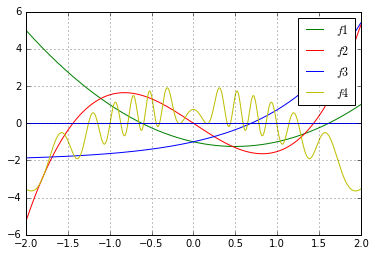

In [8]:
# 1 - plotting
f1 = lambda x: x**2 - x - 1
f2 = lambda x: x**3 - 3 * sin(x)
f3 = lambda x: exp(x) - 2
f4 = lambda x: 1 - x**2 + sin(50 / (1 + x**2))

figure()
x = linspace(-2, 2, 1000)
plot(x, f1(x), 'g', label='$f1$')
plot(x, f2(x), 'r', label='$f2$')
plot(x, f3(x), 'b', label='$f3$')
plot(x, f4(x), 'y', label='$f4$')
axhline(0)
grid()
legend()
show()


In [75]:
def incrementSearch(f, a, b, dx):
    x = a
    n = 0
    while (x < b):
        if sign(f(x)) != sign(f(x + dx)):
            return x + dx, n + 1
        x += dx    
        n += 1

    return None, n

def bisectionSearch(f, a, b, tol, maxiter):
    x, n = None, 0
    while (b - a > tol and n < maxiter):
        x = a + (b - a) / 2
        if sign(f(a)) == sign(f(x)):
            a = x
        else:
            b = x   
        n += 1
    return x, n   

def derivative(f, x, h):
    return (f(x + h) - f(x)) / h

def newtonSearch(f, x0, tol, maxiter):
    n = 0
    while(f(x0) > tol and n < maxiter):
        x0 = x0 - f(x0) / derivative(f, x0, 0.001)
        n += 1
    return x0, n   
    

In [72]:
fs = [f1, f2, f3, f4]
a = -2
b = 2
dx = 0.01
i = 0
print("Increment search")
for f in fs:
    i += 1
    x, n = incrementSearch(f, a, b, dx)
    print("Function {}".format(i))
    print("x = {0:.4f}".format(x))
    print("n = {}".format(n))

Increment search
Function 1
x = -0.6100
n = 139
Function 2
x = -1.4300
n = 57
Function 3
x = 0.7000
n = 270
Function 4
x = -1.2500
n = 75


In [76]:
print("F1 bisectionSearch")
a = -2
b = 1
x, n = bisectionSearch(f1, a, b, 0.01, 200)
print("x = {0:.4f}".format(x))
print("n = {}".format(n))
print("F1 newtonSearch")
x, n = newtonSearch(f1, a, 0.01, 200)
print("x = {0:.4f}".format(x))
print("n = {}".format(n))

F1 bisectionSearch
x = -0.6230
n = 9
F1 newtonSearch
x = -0.6190
n = 3


In [62]:
print("F2 bisectionSearch")
a = -2
b = -1
x, n = bisectionSearch(f2, a, b, 0.01, 200)
print("x = {0:.4f}".format(x))
print("n = {}".format(n))

F2
x = -1.4453
n = 7


In [69]:
print("F3 bisectionSearch")
a = -2
b = 2
x, n = bisectionSearch(f3, a, b, 0.01, 200)
print("x = {0:.4f}".format(x))
print("n = {}".format(n))

F3 bisectionSearch
x = 0.6953
n = 9


In [70]:
print("F4 bisectionSearch")
a = -2
b = 0
x, n = bisectionSearch(f4, a, b, 0.01, 200)
print("x = {0:.4f}".format(x))
print("n = {}".format(n))

F4 bisectionSearch
x = -0.9922
n = 8


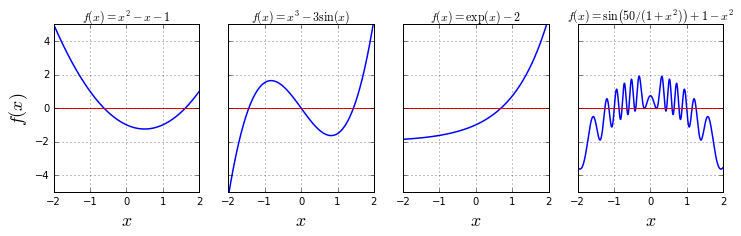

In [19]:
x = linspace(-2, 2, 1000)
f1 = lambda x: x**2 - x - 1
f2 = lambda x: x**3 - 3 * sin(x)
f3 = lambda x: exp(x) - 2
f4 = lambda x: 1 - x**2 + sin(50 / (1 + x**2))

fig, axes = subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f(x), lw=1.5)
    axes[n].axhline(0, color='r')
    axes[n].grid()
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
axes[0].set_ylabel(r'$f(x)$', fontsize=18)
titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$', r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

In [51]:
# f1
print("f1")
a = -2
b = 1
print("Bisect")
x,r = bisect(f1, a, b, xtol=0.01, full_output=True)
print("x = {0:.4f}".format(x))
print("n = {}".format(r.iterations))

print("Newton")
x = newton(f1, a, tol=0.01)
print("x = {0:.4f}".format(x))

f1
Bisect
x = -0.6230
n = 9
Newton
x = -0.6180


In [66]:
# f2 
print("f2")
a = -2
b = -1
print("Bisect")
x,r = bisect(f2, a, b, xtol=0.01, full_output=True)
print("x = {0:.4f}".format(x))
print("n = {}".format(r.iterations))

print("Newton")
x = newton(f2, a, tol=0.01)
print("x = {0:.4f}".format(x))

f2
Bisect
x = -1.4453
n = 7
Newton
x = -1.4384


In [67]:
# f3
print("f3")
a = -2
b = 2
print("Bisect")
x,r = bisect(f3, a, b, xtol=0.01, full_output=True)
print("x = {0:.4f}".format(x))
print("n = {}".format(r.iterations))

print("Newton")
x = newton(f3, -1, tol=0.01)
print("x = {0:.4f}".format(x))

f3
Bisect
x = 0.6953
n = 9
Newton
x = 0.6933


In [68]:
# f4
print("f4")
a = -2
b = 0
print("Bisect")
x,r = bisect(f4, a, b, xtol=0.01, full_output=True)
print("x = {0:.4f}".format(x))
print("n = {}".format(r.iterations))

print("Newton")
x = newton(f4, -1, tol=0.01)
print("x = {0:.4f}".format(x))

f4
Bisect
x = -0.9922
n = 8
Newton
x = -0.9951
